# OpenCV2+Python3.7

    需要具备Python基础（及numpy库、matplotlib库基础）

In [1]:
import os
import numpy as np 
from matplotlib import pyplot as plt
import cv2

In [2]:
#%matplotlib
%matplotlib inline

## GUI特性

### 图像


    在这里你将学会怎样读入一幅图像，怎样显示一幅图像，以及如何保存一幅图像
    你将要学习如下函数：cv2.imread()，cv2.imshow()，cv2.imwrite()
    使用 Matplotlib 显示一幅图片

##### 读入图像

使用函数 cv2.imread() 读入图像。这幅图像应该在此程序的工作路径，或者给函数提供完整路径，第二个参数是要告诉函数应该如何读取这幅图片。

In [2]:
#第二参数
#cv2.IMREAD_COLOR：读入一副彩色图像。图像的透明度会被忽略，这是默认参数。
#cv2.IMREAD_GRAYSCALE：以灰度模式读入图像
#cv2.IMREAD_UNCHANGED：读入一幅图像，并且包括图像的 alpha 通道
img = cv2.imread('1.jpg',0)#1，0，-1代指以上三种模式
#路径无效不会报错！

##### 显示图像

使用函数 cv2.imshow() 显示图像。第一个参数是窗口的名字，其次才是我们的图像。可以创建多个窗口，但是必须给他们不同的名字

In [5]:
cv2.imshow('image',img)
cv2.waitKey(0)
#cv2.waitKey()一个键盘绑定函数。时间尺度是毫秒级。等待特定的几毫秒，看是否有键盘输入。
#如果按下任意键，这个函数会返回按键的 ASCII 码值，程序将会继续运行。
#如果没有键盘输入，返回值为 -1，如果我们设置这个函数的参数为 0，那它将会无限期的等待键盘输入。
'''
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()
'''
cv2.destroyAllWindows()
#cv2.destroyAllWindows() 可以轻易删除任何我们建立的窗口。
#删除特定的窗口可以使用cv2.destroyWindow()，输入你想删除的窗口名。

In [6]:
#也可以先创建一个窗口再加载图像。且你可以决定窗口是否可以调整大小。
#使用cv2.namedWindow()。初始设定函数标签是cv2.WINDOW_AUTOSIZE。
#把标签改成cv2.WINDOW_NORMAL，就可以调整窗口大小了。
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

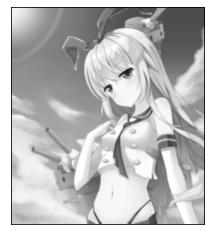

In [3]:
#Matplotlib
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#interpolation = 'bicubic',使插图更好
plt.xticks([]), plt.yticks([])
plt.show()
#注意：彩色图像使用 OpenCV 加载时是 BGR 模式。
#但是 Matplotib 是 RGB模式。所以彩色图像如果已经被 OpenCV 读取，那它将不会被 Matplotib 正确显示。

##### 保存图像

In [11]:
#使用函数 cv2.imwrite() 来保存一个图像。首先需要一个文件名，之后才是你要保存的图像。
cv2.imwrite('2.png',img)

True

### 视频

为获取视频，要创建一个 VideoCapture 对象。参数可以是设备的索引号，或者是一个视频文件。设备索引号就是在指定要使用的摄像头。一般都有内置摄像头，参数就是 0。你可以通过设置成 1 或者其他的来选择别的摄像头。之后，你就可以一帧一帧的捕获视频了。最后别忘了停止捕获视频。

##### 播放视频

In [ ]:
cap = cv2.VideoCapture(0)
while(True):
    ret, frame = cap.read()
    #cap.read() 返回一个布尔值（True/False）ret。
    #如果帧读取的是正确的，就是 True。所以最后你可以通过检查他的返回值来查看视频文件是否已经到了结尾。
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    cv2.waiKey(25)
    #播放每一帧时，使用 cv2.waiKey() 设置适当的持续时间。
    #通常情况下 25 毫秒就可以了。
    if cv2.waitKey(1)==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
#有时 cap 可能不能成功的初始化摄像头设备。这种情况会报错。
#可以使用 cap.isOpened()，来检查是否成功初始化了。如果返回值是True，那就没有问题。否则就要使用函数 cap.open()。
#可以使用函数 cap.get(propId) 来获得视频的一些参数信息。这里propId 可以是 0 到 18 之间的任何整数。每一个数代表视频的一个属性，如下
#其中的一些值可以使用 cap.set(propId,value) 来修改，value 就是你想要设置成的新值。
#可以使用 cap.get(3) 和 cap.get(4) 来查看每一帧的宽和高。
#默认情况下得到的值是 640X480。但是我可以使用 ret=cap.set(3,320)和 ret=cap.set(4,240) 来把宽和高改成 320X240。

    https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videocapture-get
    CV_CAP_PROP_POS_MSEC视频文件的当前位置（以毫秒为单位）或视频捕获时间戳。
    CV_CAP_PROP_POS_FRAMES要解码/捕获的帧的 0 个索引。
    CV_CAP_PROP_POS_AVI_RATIO视频文件的相对位置： 0 - 影片的开始， 1 - 影片的末尾.
    CV_CAP_PROP_FRAME_WIDTH视频流中帧的宽度。
    CV_CAP_PROP_FRAME_HEIGHT视频流中帧的高度。
    CV_CAP_PROP_FPS帧速率。
    CV_CAP_PROP_FOURCC 4 个字符的编解码器代码。
    CV_CAP_PROP_FRAME_COUNT视频文件中的帧数。
    CV_CAP_PROP_FORMAT由 返回的 Mat 对象的格式。retrieve()
    CV_CAP_PROP_MODE指示当前捕获模式的后端特定值。
    CV_CAP_PROP_BRIGHTNESS图像亮度（仅适用于摄像机）。
    CV_CAP_PROP_CONTRAST图像的对比度（仅适用于摄像机）。
    CV_CAP_PROP_SATURATION图像的饱和度（仅适用于摄像机）。
    CV_CAP_PROP_HUE图像的色调（仅适用于摄像机）。
    CV_CAP_PROP_GAIN图像增益（仅适用于摄像机）。
    CV_CAP_PROP_EXPOSURE曝光（仅适用于摄像机）。
    CV_CAP_PROP_CONVERT_RGB指示是否应将图像转换为 RGB 的布尔标志。
    CV_CAP_PROP_WHITE_BALANCE_U白平衡设置的 U 值（注意：当前仅支持 DC1394 v 2.x 后端）
    CV_CAP_PROP_WHITE_BALANCE_V白平衡设置的 V 值（注意：当前仅支持 DC1394 v 2.x 后端）
    CV_CAP_PROP_RECTIFICATION立体声摄像机的整流标志（注意：当前仅支持 DC1394 v 2.x 后端）
    CV_CAP_PROP_ISO_SPEED摄像机的 ISO 感光度（注意：当前仅支持 DC1394 v 2.x 后端）
    CV_CAP_PROP_BUFFERSIZE存储在内部缓冲区内存中的帧数（注意：当前仅支持 DC1394 v 2.x 后端）

##### 保存视频

创建一个 VideoWriter 的对象。我们应该确定一个输出文件的名字。接下来指定 FourCC 编码（下面会介绍）。播放频率和帧的大小也都需要确定。最后一个是 isColor 标签。如果是 True，每一帧就是彩色图，否则就是灰度图。

    FourCC 就是一个 4 字节码，用来确定视频的编码格式。可用的编码列表可以从fourcc.org查到。这是平台依赖的。下面这些编码器对我来说是有用个。
        • In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 givesvery small size video)
        • In Windows: DIVX (More to be tested and added)
        • In OSX : (I don’t have access to OSX. Can some one fill this?) 
    FourCC 码以下面的格式传给程序，以 MJPG 为例：
    cv2.cv.FOURCC('M','J','P','G') 或者 cv2.cv.FOURCC(*'MJPG')。

In [ ]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)
        # write the flipped frame
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1)== ord('q'):
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

### 绘图函数

将会学习到这些函数：cv2.line()，cv2.circle()，cv2.rectangle() ，cv2.ellipse() ，cv2.putText() 等

    上面所有的这些绘图函数需要设置下面这些参数：
      • img：你想要绘制图形的那幅图像。
      • color：形状的颜色。以 RGB 为例，需要传入一个元组，例如： （255,0,0 ）代表蓝色。对于灰度图只需要传入灰度值。
      • thickness：线条的粗细。如果给一个闭合图形设置为 -1，那么这个图形就会被填充。默认值是 1.
      • linetype：线条的类型，8 连接，抗锯齿等。默认情况是 8 连接。cv2.LINE_AA为抗锯齿，这样看起来会非常平滑。

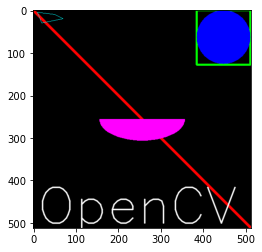

In [36]:
#画线
#要画一条线，你只需要告诉函数这条线的起点和终点。
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)

#画矩形
#要画一个矩形，你需要告诉函数的左上角顶点和右下角顶点的坐标。这次我们会在图像的右上角话一个绿色的矩形。
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

#画圆
#要画圆的话，只需要指定圆形的中心点坐标和半径大小。我们在上面的矩形中画一个圆。
cv2.circle(img,(447,63), 63, (0,0,255), -1)

#画椭圆
#画椭圆比较复杂，我们要多输入几个参数。一个参数是中心点的位置坐标。
#下一个参数是长轴和短轴的长度。椭圆沿逆时针方向旋转的角度。椭圆弧演顺时针方向起始的角度和结束角度，如果是 0 很 360，就是整个椭圆。
cv2.ellipse(img,(256,256),(100,50),0,0,180,(255,0,255),-1)

#画多边形
#画多边形，需要指点每个顶点的坐标。用这些点的坐标构建一个大小等于行数 X1X2 的数组，行数就是点的数目。这个数组的数据类型必须为 int32。
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255))
'''
这里 reshape 的第一个参数为 -1, 表明这一维的长度是根据后面的维度的计算出来的。
注意：如果第三个参数是 False，我们得到的多边形是不闭合的（首尾不相连）。
注意：cv2.polylines() 可以被用来画很多条线。只需要把想要画的线放在一个列表中，将这个列表传给函数就可以了。
每条线都会被独立绘制。这会比用cv2.line() 一条一条的绘制要快一些。
'''
#在图片上添加文字
#要在图片上绘制文字，你需要设置下列参数：
#• 你要绘制的文字
#• 你要绘制的位置
#• 字体类型（通过查看 cv2.putText() 的文档找到支持的字体）
#• 字体的大小
#• 文字的一般属性如颜色，粗细，线条的类型等。为了更好看一点推荐使用linetype=cv2.LINE_AA。
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)

### 鼠标当画笔

将要学习的函数是：cv2.setMouseCallback()

In [37]:
#下列代码查看所有被支持的鼠标事件。
events=[i for i in dir(cv2) if 'EVENT'in i]
print(events) 

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [38]:
#在双击过的地方绘制一个圆圈
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20)== 27:
        break
cv2.destroyAllWindows()

In [39]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
# Next we have to bind this mouse callback function to OpenCV # # window. In the main loop, we should set a keyboard binding for # key ‘m’ to toggle between rectangle and circle.
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1)
    if k == ord('m'): # 切换模式
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()
'''
你可以试着修改代码绘制一个没有填充的矩形。
if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                # cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),1)
                pass
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
'''

### 滑动条做调色板

将会学习这些函数：cv2.getTrackbarPos()，cv2.creatTrackbar()等。

cv2.getTrackbarPos() 函数：

　　第一个参数是滑动条的名字

　　第二个参数是滑动条被放置窗口的名字

　　第三个参数是滑动条的默认位置。第四个参数是滑动条的最大值

　　第五个函数是回调函数，每次滑动条的滑动都会调用回调函数。回调函数通常都会含有一个默认参数，就是滑动条的位置。在本例中这个函数不用做任何事情，我们只需要 pass 就可以了。

In [40]:
def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv2.destroyAllWindows()

## 核心操作

### 基础操作

    目标
      • 获取像素值并修改
      • 获取图像的属性（信息）
      • 图像的 ROI（）
      • 图像通道的拆分及合并

#### 获取并修改像素值

In [65]:
img=cv2.imread('1.jpg')
#100，100坐标下的像素点
#BGRA通道分别对应0123
print(img[100,100])
img[100,100,0]=255
print(img[100,100])
img[100,100]=255
print(img[100,100])
img[100,100]=[255,0,1]
print(img[100,100])
'''
警告：Numpy 是经过优化了的进行快速矩阵运算的软件包。所以我们不推荐逐个获取像素值并修改，这样会很慢，能有矩阵运算就不要用循环。
注意：上面提到的方法被用来选取矩阵的一个区域，比如说前5行的后3列。对于获取每一个像素值，使用Numpy的array.item()和array.itemset()会更好。
但是返回值是标量。如果你想获得所有 B，G，R 的值，你需要使用 array.item() 分割他们。
'''
print(img.item(100,100,0))#读取
img.itemset((100,100,0),100)#设置
print(img.item(100,100,0))

[209 160 144]
[255 160 144]
[255 255 255]
[255   0   1]
255
100


#### 获取图像属性

    图像的属性包括：行，列，通道，图像数据类型，像素数目等

In [66]:
#img.shape 可以获取图像的形状。他的返回值是一个包含行数，列数，通道数的元组。
print(img.shape)
#注意：如果图像是灰度图，返回值仅有行数和列数。所以通过检查这个返回值就可以知道加载的是灰度图还是彩色图。

(901, 800, 3)


In [68]:
#img.size 可以返回图像的像素数目
print(img.size, img.dtype)
#img.dype返回图像数据类型
#注意：在debug时 img.dtype 非常重要。因为在 OpenCV Python 代码中经常出现数据类型的不一致。

2162400 uint8


####  图像 ROI

    有时你需要对一幅图像的特定区域进行操作。ROI 也是使用 Numpy 索引来获得的。

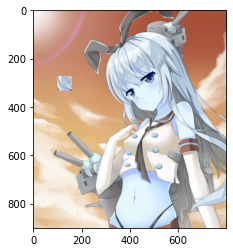

In [69]:
ball=img[280:340,330:390]#切片
img[273:333,100:160]=ball
plt.imshow(img)

#### 拆分合并与修改图像通道

    对 BGR 三个通道分别进行操作，就需要把 BGR 拆分成单个通道。把独立通道的图片合并成一个 BGR 图像

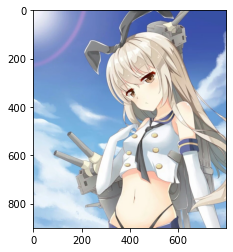

In [77]:
img=cv2.imread('1.jpg')
b,g,r=cv2.split(img)#拆分
img=cv2.merge([r,g,b])#组合
plt.imshow(img)

In [73]:
#或者
b=img[:,:,0]
g=img[:,:,1]
r=img[:,:,2]
#cv2.split()更费事

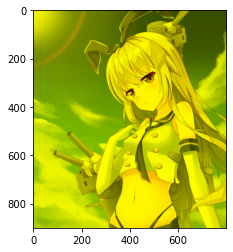

In [78]:
img[:,:,2]=0
plt.imshow(img)

#### 为图像扩边（填充）

    如果你想在图像周围创建一个边，就像相框一样，你可以使用 cv2.copyMakeBorder()函数。这经常在卷积运算或 0 填充时被用到。这个函数包括如下参数：
      • src 输入图像
      • top, bottom, left, right 对应边界的像素数目。
      • borderType 要添加那种类型的边界，类型如下：
        – cv2.BORDER_CONSTANT 添加有颜色的常数值边界，还需要下一个参数（value）。
        – cv2.BORDER_REFLECT 边界元素的镜像。
        – cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT跟上面一样，但稍作改动。
        – cv2.BORDER_REPLICATE 重复最后一个元素。
        – cv2.BORDER_WRAP 
      • value 边界颜色，如果边界的类型是 cv2.BORDER_CONSTANT

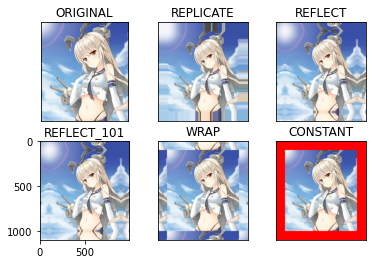

In [91]:
BLUE=[255,0,0]
img=cv2.imread('1.jpg')
b=img[:,:,0]
g=img[:,:,1]
r=img[:,:,2]
img1=cv2.merge([r,g,b])
replicate = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1),plt.title('ORIGINAL')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(replicate),plt.title('REPLICATE')
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(reflect),plt.title('REFLECT')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(reflect101),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap),plt.title('WRAP')
plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(constant),plt.title('CONSTANT')
plt.xticks([]), plt.yticks([])
plt.show()

#### 图像上的算术运算

    目标
      • 学习图像上的算术运算，加法，减法，位运算等。
      • 我们将要学习的函数与有：cv2.add()，cv2.addWeighted() 等。

[[255]]
[4]


(<matplotlib.axes._subplots.AxesSubplot at 0x255c1bdce08>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

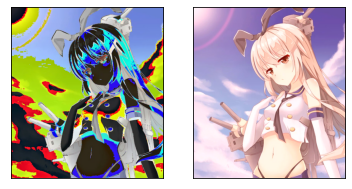

In [92]:
#图像加法
#可以使用函数 cv2.add() 将两幅图像进行加法运算，也可以直接使用 numpy，res=img1+img。
#两幅图像的大小，类型必须一致，或者第二个图像可以使一个简单的标量值。
#注意：OpenCV 中的加法与 Numpy 的加法是有所不同的。OpenCV 的加法是一种饱和操作，而 Numpy 的加法是一种模操作。
x = np.uint8([250])
y = np.uint8([10])
print (cv2.add(x,y)) # 250+10 = 260 => 255
print (x+y) # 250+10 = 260 % 256 = 4
img2=img1+50
plt.subplot(121),plt.imshow(img2),plt.xticks([]), plt.yticks([])
img3=cv2.add(img1,50)
plt.subplot(122),plt.imshow(img3),plt.xticks([]), plt.yticks([])

#图像减法
#cv2.subtract(src1, src2, dst=None, mask=None, dtype=None)

(901, 800, 3) (508, 672, 3)


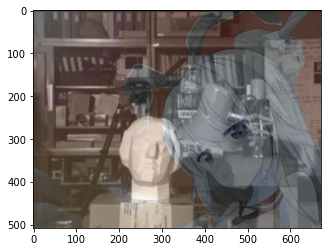

In [104]:
#图像混合
#这其实也是加法，但是不同的是两幅图像的权重不同，这就会给人一种混合或者透明的感觉。图像混合的计算公式如下：
#g (x) = (1 − α)f 0 (x) + αf 1 (x)
#通过修改 α 的值（0 → 1），可以实现非常酷的混合。
#现在我们把两幅图混合在一起。第一幅图的权重是 0.7，第二幅图的权重是 0.3。函数 cv2.addWeighted() 可以按下面的公式对图片进行混合操作。
#dst = α · img1 + β · img2 + γ,这里 γ 的取值为 0。
##注意：图像大小要一致
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.png')
print(img1.shape,img2.shape)
rows,cols,channels=img2.shape
img3=img1[:rows,:cols,:]
dst = cv2.addWeighted(img2,0.7,img3,0.3,0)
plt.imshow(dst)

<function matplotlib.pyplot.show(*args, **kw)>

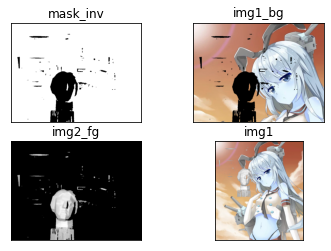

In [114]:
#按位运算
#这里包括的按位操作有：AND，OR，NOT，XOR 等。
#当我们提取图像的一部分，选择非矩形 ROI 时这些操作会很有用。
#把 OpenCV 的标志放到另一幅图像上。如果我使用加法，颜色会改变，如果使用混合，会得到透明效果
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.png')
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)#灰度
ret, mask = cv2.threshold(img2gray, 140, 255, cv2.THRESH_BINARY)#二值化
mask_inv = cv2.bitwise_not(mask)#反转掩膜
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)#白色保留
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.subplot(221),plt.imshow(mask_inv,cmap='gray'),plt.xticks([]), plt.yticks([]),plt.title('mask_inv')
plt.subplot(222),plt.imshow(img1_bg),plt.xticks([]), plt.yticks([]),plt.title('img1_bg')
plt.subplot(223),plt.imshow(img2_fg),plt.xticks([]), plt.yticks([]),plt.title('img2_fg')
plt.subplot(224),plt.imshow(img1),plt.xticks([]), plt.yticks([]),plt.title('img1')
plt.show
'''
bitwise_and是对二进制数据进行“与”操作，即对图像（灰度图像或彩色图像均可）每个像素值进行二进制“与”操作，1&1=1，1&0=0，0&1=0，0&0=0
bitwise_or是对二进制数据进行“或”操作，即对图像（灰度图像或彩色图像均可）每个像素值进行二进制“或”操作，1|1=1，1|0=0，0|1=0，0|0=0
bitwise_xor是对二进制数据进行“异或”操作，即对图像（灰度图像或彩色图像均可）每个像素值进行二进制“异或”操作，1^1=0,1^0=1,0^1=1,0^0=0
bitwise_not是对二进制数据进行“非”操作，即对图像（灰度图像或彩色图像均可）每个像素值进行二进制“非”操作，~1=0，~0=1
'''

### 程序性能检测及优化

In [122]:
#使用 OpenCV 检测程序效率
#cv2.getTickCount 函数返回从参考点到这个函数被执行的时钟数。所以当你在一个函数执行前后都调用它的话，你就会得到这个函数的执行时间（时钟数）。
#cv2.getTickFrequency 返回时钟频率，或者说每秒钟的时钟数。
e1 = cv2.getTickCount()
#code
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
#
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time,'s')
#也 可 以 中 time 模 块 实 现 上 面 的 功 能。

1.1622097 s


In [126]:
#OpenCV 中的默认优化
#OpenCV 中的很多函数都被优化过（使用 SSE2，AVX 等）。
#也包含一些没有被优化的代码。如果我们的系统支持优化的话要尽量利用只一点。在编译时优化是被默认开启的。
#因此 OpenCV 运行的就是优化后的代码，如果你把优化关闭的话就只能执行低效的代码了。
#你可以使用函数 cv2.useOptimized()来查看优化是否被开启了，使用函数 cv2.setUseOptimized() 来开启优化。
print(cv2.useOptimized())
cv2.setUseOptimized(False)
print(cv2.useOptimized())
cv2.setUseOptimized(True)
print(cv2.useOptimized())

True
False
True


## 图像处理

### 颜色空间转换

    目标
      • 你将学习如何对图像进行颜色空间转换，比如从 BGR 到灰度图，或者从BGR 到 HSV 等。
      • 我没还要创建一个程序用来从一幅图像中获取某个特定颜色的物体。
      • 我们将要学习的函数有：cv2.cvtColor()，cv2.inRange() 等。

####  转换颜色空间

    OpenCV 中有超过 150 中进行颜色空间转换的方法。
    常用两种：BGR↔Gray 和 BGR↔HSV。
    用到的函数cv2.cvtColor(input_image ，flag)，flag就是转换类型。
    对于 BGR↔Gray 的转换，我们要使用的 flag 就是 cv2.COLOR_BGR2GRAY。
    对于 BGR↔HSV 的转换，我们用的 flag 就是 cv2.COLOR_BGR2HSV。

In [132]:
#可以通过下面的命令得到所有可用的 flag。
for i in dir(cv2):
    if 'COLOR_' in i:
        print(i)
'''
注意：在 OpenCV 的 HSV 格式中
H（色彩/色度）的取值范围是 [0，179]，S（饱和度）的取值范围 [0，255]，V（亮度）的取值范围 [0，255]
不同的软件使用的值可能不同。所以当你需要拿 OpenCV 的 HSV 值与其他软件的 HSV 值进行对比时，一定要记得归一化。
'''

CAP_PROP_XI_COLOR_FILTER_ARRAY
COLOR_BAYER_BG2BGR
COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA
COLOR_BAYER_BG2BGR_VNG
COLOR_BAYER_BG2GRAY
COLOR_BAYER_BG2RGB
COLOR_BAYER_BG2RGBA
COLOR_BAYER_BG2RGB_EA
COLOR_BAYER_BG2RGB_VNG
COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA
COLOR_BAYER_GB2BGR_EA
COLOR_BAYER_GB2BGR_VNG
COLOR_BAYER_GB2GRAY
COLOR_BAYER_GB2RGB
COLOR_BAYER_GB2RGBA
COLOR_BAYER_GB2RGB_EA
COLOR_BAYER_GB2RGB_VNG
COLOR_BAYER_GR2BGR
COLOR_BAYER_GR2BGRA
COLOR_BAYER_GR2BGR_EA
COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GR2GRAY
COLOR_BAYER_GR2RGB
COLOR_BAYER_GR2RGBA
COLOR_BAYER_GR2RGB_EA
COLOR_BAYER_GR2RGB_VNG
COLOR_BAYER_RG2BGR
COLOR_BAYER_RG2BGRA
COLOR_BAYER_RG2BGR_EA
COLOR_BAYER_RG2BGR_VNG
COLOR_BAYER_RG2GRAY
COLOR_BAYER_RG2RGB
COLOR_BAYER_RG2RGBA
COLOR_BAYER_RG2RGB_EA
COLOR_BAYER_RG2RGB_VNG
COLOR_BGR2BGR555
COLOR_BGR2BGR565
COLOR_BGR2BGRA
COLOR_BGR2GRAY
COLOR_BGR2HLS
COLOR_BGR2HLS_FULL
COLOR_BGR2HSV
COLOR_BGR2HSV_FULL
COLOR_BGR2LAB
COLOR_BGR2LUV
COLOR_BGR2Lab
COLOR_BGR2Luv
COLOR_BGR2RGB
COLOR_BGR2RGBA
CO

'\n注意：在 OpenCV 的 HSV 格式中\nH（色彩/色度）的取值范围是 [0，179]，S（饱和度）的取值范围 [0，255]，V（亮度）的取值范围 [0，255]\n不同的软件使用的值可能不同。所以当你需要拿 OpenCV 的 HSV 值与其他软件的 HSV 值进行对比时，一定要记得归一化。\n'

#### 物体跟踪

    可以利用HSV来提取带有某个特定颜色的物体。在 HSV 颜色空间中要比在 BGR 空间中更容易表示一个特定颜色。
      • 从视频中获取每一帧图像
      • 将图像转换到 HSV 空间
      • 设置 HSV 阈值到蓝色范围。
      • 获取蓝色物体，当然我们还可以做其他任何我们想做的事，比如：在蓝色物体周围画一个圈。

In [7]:
cap = cv2.VideoCapture(0)
while(1):
    ret, frame = cap.read()
    if ret!=True:
        break
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([10,40,40])#设置颜色范围
    upper_blue = np.array([50,255,255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)#以颜色做掩膜
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5)
    if k == 27:
        break
cv2.destroyAllWindows()

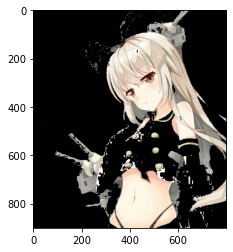

In [35]:
#图像获取
img=cv2.imread('1.jpg')
b=img[:,:,0]
g=img[:,:,1]
r=img[:,:,2]
img1=cv2.merge([r,g,b])
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
lower = np.array([50,0,10])#设置颜色范围
upper = np.array([120,255,255])
mask = cv2.inRange(hsv, lower, upper)#以颜色做掩膜
res = cv2.bitwise_and(img1,img1, mask= mask)
plt.imshow(res)

### 几何变换

    目标
      • 学习对图像进行各种几个变换，例如移动，旋转，仿射变换等。
      • 将要学到的函数有：cv2.getPerspectiveTransform。

    变换
    OpenCV 提供了两个变换函数，cv2.warpAffine 和 cv2.warpPerspective，使用这两个函数你可以实现所有类型的变换。
    cv2.warpAffine 接收的参数是2×3的变换矩阵，而 cv2.warpPerspective 接收的参数是3×3的变换矩阵。

#### 扩展缩放

    扩展缩放只是改变图像的尺寸大小。函数cv2.resize()可以实现这个功能。
    尺寸可以自己手动设置，也可以指定缩放因子。
    可以选择使用不同的插值方法。在缩放时我们推荐使用 cv2.INTER_AREA，在扩展时我们推荐使用 v2.INTER_CUBIC（慢) 和 v2.INTER_LINEAR。
    默认情况下所有改变图像尺寸大小的操作使用的插值方法都是 cv2.INTER_LINEAR。

In [45]:
# 下面的 None 本应该是输出图像的尺寸，但是因为后边我们设置了缩放因子
# 因此这里为 None
#fx,fy缩放因子
print(img.shape)
res=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
height,width=res.shape[:2]
print(height,width)
#res=cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_CUBIC)

(901, 800, 3)
1802 1600


#### 平移

    平移就是将对象换一个位置。如果你要沿（x，y）方向移动，移动的距离是（t x ，t y ），你可以以下面的方式构建移动矩阵：
    M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y  \end{bmatrix}

'\n警告：函数 cv2.warpAffine() 的第三个参数的是输出图像的大小，它的格式应该是图像的（宽，高）。\n应该记住的是图像的宽对应的是列数，高对应的是行数。\n'

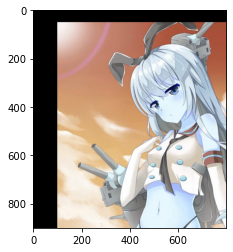

In [47]:
rows,cols = img.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])#移动(100,50)
dst = cv2.warpAffine(img,M,(cols,rows))# 第三个参数是输出图像的尺寸中心
plt.imshow(dst)
#为显示效果可先绘制大画布
'''
警告：函数 cv2.warpAffine() 的第三个参数的是输出图像的大小，它的格式应该是图像的（宽，高）。
应该记住的是图像的宽对应的是列数，高对应的是行数。
'''

#### 旋转

    对一个图像旋转角度 θ, 需要使用到下面形式的旋转矩阵。
    M = \begin{bmatrix}\label{eq:} cos\theta & -sin\theta \\ sin\theta & cos\theta   \end{bmatrix}
    但是 OpenCV 允许你在任意地方进行旋转，但是旋转矩阵的形式应该修
    改为
       \begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot center.x -  \beta \cdot center.y \\ - \beta &  \alpha &  \beta \cdot center.x + (1- \alpha )  \cdot center.y \end{bmatrix}
    其中：
       \begin{array}{l} \alpha =  scale \cdot \cos \theta , \\ \beta =  scale \cdot \sin \theta \end{array}
    为了构建这个旋转矩阵，OpenCV 提供了一个函数：cv2.getRotationMatrix2D

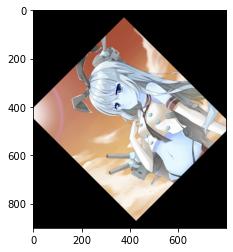

In [56]:
rows,cols=img.shape[:2]
# 第一个参数为旋转中心，第二个为旋转角度，第三个为旋转后的缩放因子
# 可以通过设置旋转中心，缩放因子，以及窗口大小来防止旋转后超出边界的问题
M=cv2.getRotationMatrix2D((int(cols/2),int(rows/2)),45,0.7)
# 第三个参数是输出图像的尺寸中心
dst=cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

#### 仿射变换

    在仿射变换中，原图中所有的平行线在结果图像中同样平行。
    为了创建这个矩阵我们需要从原图像中找到三个点以及他们在输出图像中的位置。
    然后cv2.getAffineTransform 会创建一个 2x3 的矩阵，最后这个矩阵会被传给函数 cv2.warpAffine。
    #建议三点构成直角

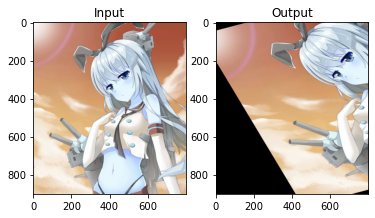

In [58]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### 透视变换

    对于视角变换，我们需要一个 3x3 变换矩阵。在变换前后直线还是直线。
    要构建这个变换矩阵，你需要在输入图像上找 4 个点，以及他们在输出图像上对应的位置。
    这四个点中的任意三个都不能共线。这个变换矩阵可以有函数 cv2.getPerspectiveTransform() 构建。
    然后把这个矩阵传给函数cv2.warpPerspective。

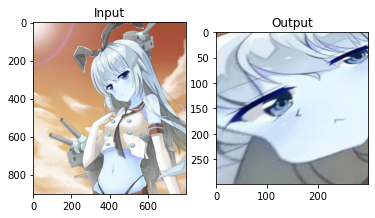

In [62]:
pts1 = np.float32([[300,200],[500,200],[400,400],[500,450]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### 图像阈值

    目标
      • 将学到简单阈值，自适应阈值，Otsu’s 二值化等
      • 将要学习的函数有 cv2.threshold，cv2.adaptiveThreshold 等。

#### 简单阈值

    这种方法非常简单。但像素值高于阈值时，我们给这个像素赋予一个新值（可能是白色），否则我们给它赋予另外一种颜色（也许是黑色）。
    这个函数就是 cv2.threshhold()。
    这个函数的第一个参数就是原图像，原图像应该是灰度图。
    第二个参数就是用来对像素值进行分类的阈值。
    第三个参数就是当像素值高于（有时是小于）阈值时应该被赋予的新的像素值。
    OpenCV提供了多种不同的阈值方法，这是有第四个参数来决定的。这些方法包括：
      • cv2.THRESH_BINARY
      • cv2.THRESH_BINARY_INV
      • cv2.THRESH_TRUNC
      • cv2.THRESH_TOZERO
      • cv2.THRESH_TOZERO_INV

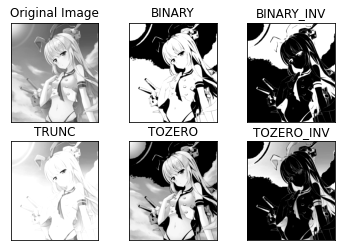

In [67]:
img=cv2.imread('1.jpg',0)
ret,thresh1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,150,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,150,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### 自适应阈值

    前面的部分用是全局阈值，整幅图像采用同一个数作为阈值。这种方法并不适应与所有情况，尤其是当同一幅图像上的不同部分的具有不同亮度时。
    这种情况下需要采用自适应阈值。此时的阈值是根据图像上的每一个小区域计算与其对应的阈值。
    因此在同一幅图像上的不同区域采用的是不同的阈值，从而使我们能在亮度不同的情况下得到更好的结果。
    这种方法需要我们指定三个参数，返回值只有一个。
      • Adaptive Method- 指定计算阈值的方法。
      – cv2.ADPTIVE_THRESH_MEAN_C：阈值取自相邻区域的平均值
      – cv2.ADPTIVE_THRESH_GAUSSIAN_C：阈值取值相邻区域的加权和，权重为一个高斯窗口。
      • Block Size - 邻域大小（用来计算阈值的区域大小）。
      • C - 这就是是一个常数，阈值就等于的平均值或者加权平均值减去这个常数。

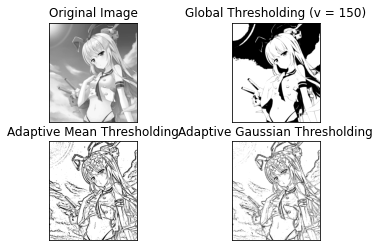

In [71]:
#差别
img = cv2.imread('1.jpg',0)
#img = cv2.medianBlur(img,5)#中值滤波
ret,th1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 150)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### Otsu’ ’s 二值化

    使用全局阈值时，我们随便给了一个数来做阈值，我们怎么知道我们选取的这个数的好坏？答案就是不停的尝试。
    如果是一副双峰图像呢？我们岂不是应该在两个峰之间的峰谷选一个值作为阈值？
    这就是 Otsu 二值化要做的。简单来说就是对一副双峰图像自动根据其直方图计算出一个阈值。
    这里用到到的函数还是 cv2.threshold()，但是需要多传入一个参数（flag）：cv2.THRESH_OTSU。
    这时要把阈值设为 0。然后算法会找到最优阈值，这个最优阈值就是返回值 retVal。
    如果不使用 Otsu 二值化，返回的retVal 值与设定的阈值相等。

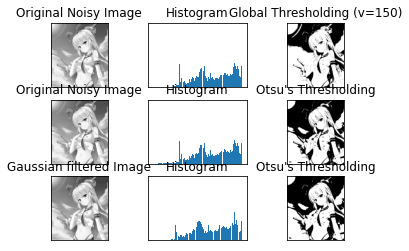

In [75]:
img = cv2.imread('1.jpg',0)
#简单
ret1,th1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
# Otsu's
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# 高斯滤波加Otsu's 
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=150)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
#使用双波峰图片更具优势

In [ ]:
#Otsu's二值化是如何工作的？
'''
因为是双峰图，Otsu 算法就是要找到一个阈值（t）, 使得同一类加权方差最小，需要满足下列关系式：

　　　　　　\sigma_w^2(t) = q_1(t)\sigma_1^2(t)+q_2(t)\sigma_2^2(t)
　　其中：

　　q_1(t) = \sum_{i=1}^{t} P(i) \quad \& \quad q_1(t) = \sum_{i=t+1}^{I} P(i)

\mu_1(t) = \sum_{i=1}^{t} \frac{iP(i)}{q_1(t)} \quad \& \quad \mu_2(t) = \sum_{i=t+1}^{I} \frac{iP(i)}{q_2(t)}

\sigma_1^2(t) = \sum_{i=1}^{t} [i-\mu_1(t)]^2 \frac{P(i)}{q_1(t)} \quad \& \quad \sigma_2^2(t) = \sum_{i=t+1}^{I} [i-\mu_1(t)]^2 \frac{P(i)}{q_2(t)}
其实就是在两个峰之间找到一个阈值 t，将这两个峰分开，并且使每一个峰内的方差最小。
'''
img = cv2.imread('noisy2.png',0)
blur = cv2.GaussianBlur(img,(5,5),0)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in xrange(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
prin(thresh,ret)

### 图像平滑

    目标
      • 学习使用不同的低通滤波器对图像进行模糊
      • 使用自定义的滤波器对图像进行卷积（2D 卷积）

#### 2D 卷积

    与一维信号一样，我们也可以对 2D 图像实施低通滤波（LPF），高通滤波（HPF）等。
    LPF 帮助我们去除噪音，模糊图像。HPF 帮助我们找到图像的边缘
    OpenCV 提供的函数 cv.filter2D() 可以让我们对一幅图像进行卷积操作。
    下面我们将对一幅图像使用平均滤波器。下面是一个 5x5 的平均滤波器核：
       K =  \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1  \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}
    操作如下：将核放在图像的一个像素 A 上，求与核对应的图像上 25（5x5）个像素的和，在取平均数，用这个平均数替代像素 A 的值。重复以上操作直到将图像的每一个像素值都更新一边。

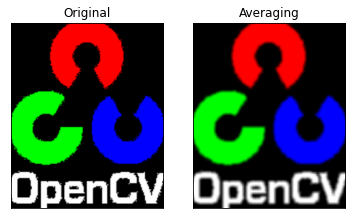

In [5]:
img = cv2.imread('3.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

#### 图像模糊（图像平滑）

##### 平均

    这是由一个归一化卷积框完成的。他只是用卷积框覆盖区域所有像素的平均值来代替中心元素。
    可以使用函数 cv2.blur() 和 cv2.boxFilter() 来完这个任务。
    可以同看查看文档了解更多卷积框的细节。我们需要设定卷积框的宽和高。下面是一个 3x3 的归一化卷积框：
          K =  \frac{1}{9} \begin{bmatrix} 1 & 1 & 1  \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}
    注意：如果你不想使用归一化卷积框，你应该使用 cv2.boxFilter()，这时要传入参数 normalize=False。

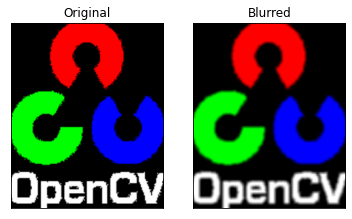

In [6]:
blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

##### 高斯模糊

    把卷积核换成高斯核。实现的函数是 cv2.GaussianBlur()。
    我们需要指定高斯核的宽和高（必须是奇数）。以及高斯函数沿 X，Y 方向的标准差。
    如果我们只指定了 X 方向的的标准差，Y 方向也会取相同值。
    如果两个标准差都是 0，那么函数会根据核函数的大小自己计算。
    高斯滤波可以有效的从图像中去除高斯噪音。
    如果你愿意的话，你也可以使用函数 cv2.getGaussianKernel() 自己构建一个高斯核。

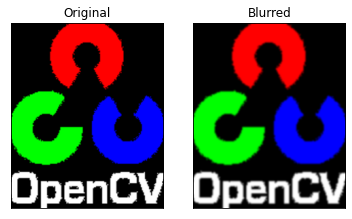

In [7]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

##### 中值模糊

    用与卷积框对应像素的中值来替代中心像素的值。这个滤波器经常用来去除椒盐噪声。
    前面的滤波器都是用计算得到的一个新值来取代中心像素的值，而中值滤波是用中心像素周围（也可以使他本身）的值来取代他。
    他能有效的去除噪声。卷积核的大小也应该是一个奇数。

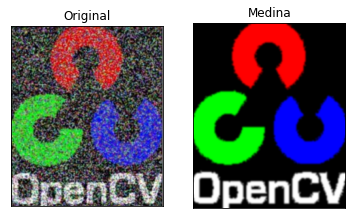

In [10]:
img=cv2.imread('4.png')
median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Medina')
plt.xticks([]), plt.yticks([])
plt.show()

##### 双边滤波

    函数 cv2.bilateralFilter() 能在保持边界清晰的情况下有效的去除噪音。
    但是这种操作与其他滤波器相比会比较慢。我们已经知道高斯滤波器是求中心点邻近区域像素的高斯加权平均值。
    这种高斯滤波器只考虑像素之间的空间关系，而不会考虑像素值之间的关系（像素的相似度）。
    所以这种方法不会考虑一个像素是否位于边界。因此边界也会别模糊掉。
    双边滤波在同时使用空间高斯权重和灰度值相似性高斯权重。
    空间高斯函数确保只有邻近区域的像素对中心点有影响，灰度值相似性高斯函数确保只有与中心像素灰度值相近的才会被用来做模糊运算。
    所以这种方法会确保边界不会被模糊掉，因为边界处的灰度值变化比较大。

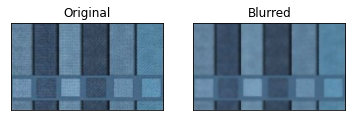

In [11]:
img=cv2.imread('5.png')
#9 邻域直径，两个 75 分别是空间高斯函数标准差，灰度值相似性高斯函数标准差
blur = cv2.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 形态学转换

    目标
      • 学习不同的形态学操作，例如腐蚀，膨胀，开运算，闭运算等
      • 我们要学习的函数有：cv2.erode()，cv2.dilate()，cv2.morphologyEx()等
    原理
      形态学操作是根据图像形状进行的简单操作。一般情况下对二值化图像进行的操作。
      需要输入两个参数，一个是原始图像，第二个被称为结构化元素或核，它是用来决定操作的性质的。
      两个基本的形态学操作是腐蚀和膨胀。他们的变体构成了开运算，闭运算，梯度等。

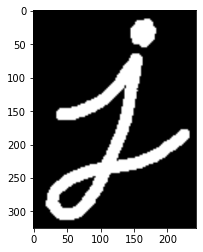

In [80]:
img=cv2.imread('j.png',0)
plt.imshow(img,cmap = 'gray')

#### 腐蚀

    这个操作会把前景物体的边界腐蚀掉（但是前景仍然是白色).
    卷积核沿着图像滑动，如果与卷积核对应的原图像的所有像素值都是 1，那么中心元素就保持原来的像素值，否则就变为零。
    根据卷积核的大小靠近前景的所有像素都会被腐蚀掉（变为 0），所以前景物体会变小，整幅图像的白色区域会减少。
    这对于去除白噪声很有用，也可以用来断开两个连在一块的物体等。

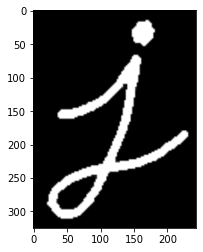

In [81]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion,cmap = 'gray')

#### 膨胀

    与腐蚀相反，与卷积核对应的原图像的像素值中只要有一个是 1，中心元素的像素值就是 1。
    所以这个操作会增加图像中的白色区域（前景）。
    一般在去噪声时先用腐蚀再用膨胀。因为腐蚀在去掉白噪声的同时，也会使前景对象变小。
    所以我们再对他进行膨胀。这时噪声已经被去除了，不会再回来了，但是前景还在并会增加。
    膨胀也可以用来连接两个分开的物体。

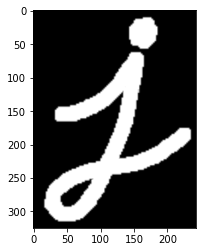

In [82]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation,cmap = 'gray')

#### 开运算

    先进性腐蚀再进行膨胀就叫做开运算。

(<matplotlib.axes._subplots.AxesSubplot at 0x18f34ca5188>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

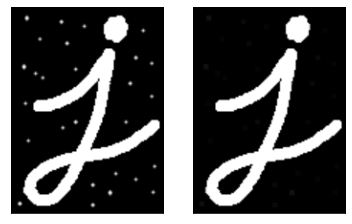

In [83]:
img=cv2.imread('jo.png',0)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.subplot(121),plt.imshow(img,cmap = 'gray'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening,cmap = 'gray'),plt.xticks([]), plt.yticks([])

#### 闭运算

    先膨胀再腐蚀。它经常被用来填充前景物体中的小洞，或者前景物体上的小黑点。

(<matplotlib.axes._subplots.AxesSubplot at 0x18f34d150c8>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

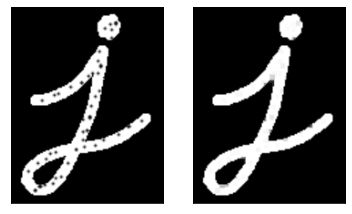

In [84]:
img=cv2.imread('jc.png',0)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.subplot(121),plt.imshow(img,cmap = 'gray'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing,cmap = 'gray'),plt.xticks([]), plt.yticks([])

#### 形态学梯度

    就是一幅图像膨胀与腐蚀的差别(相减)

(<matplotlib.axes._subplots.AxesSubplot at 0x18f34d8f948>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

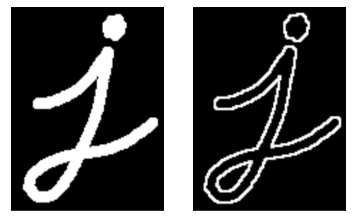

In [85]:
img=cv2.imread('j.png',0)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.subplot(121),plt.imshow(img,cmap = 'gray'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient,cmap = 'gray'),plt.xticks([]), plt.yticks([])

#### 礼帽

    原始图像与进行开运算之后得到的图像的差。

(<matplotlib.axes._subplots.AxesSubplot at 0x18f30eb0788>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

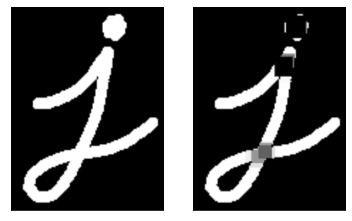

In [86]:
kernel = np.ones((21,21),np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.subplot(121),plt.imshow(img,cmap = 'gray'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tophat,cmap = 'gray'),plt.xticks([]), plt.yticks([])

#### 黑帽

    闭运算之后得到的图像与原始图像的差

(<matplotlib.axes._subplots.AxesSubplot at 0x18f34a58388>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

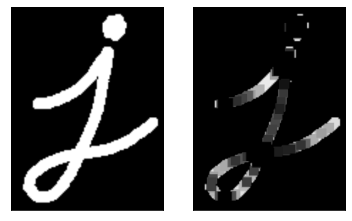

In [87]:
kernel = np.ones((15,15),np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.subplot(121),plt.imshow(img,cmap = 'gray'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tophat,cmap = 'gray'),plt.xticks([]), plt.yticks([])

### 图像梯度

    目标
      • 图像梯度，图像边界等
      • 使用到的函数有：cv2.Sobel()，cv2.Schar()，cv2.Laplacian() 等

    原理
      梯度简单来说就是求导。
      OpenCV 提供了三种不同的梯度滤波器，或者说高通滤波器：Sobel，Scharr 和 Laplacian。我们会一一介绍他们。
      Sobel，Scharr 其实就是求一阶或二阶导数。Scharr 是对 Sobel（使用小的卷积核求解求解梯度角度时）的优化。Laplacian 是求二阶导数。

#### Sobel 算子、Scharr 算子、Laplacian 算子

    Sobel 算子是高斯平滑与微分操作的结合体，所以它的抗噪声能力很好。
    你可以设定求导的方向（xorder 或 yorder）。还可以设定使用的卷积核的大小（ksize）。
    如果 ksize=-1，会使用 3x3 的 Scharr 滤波器，它的的效果要比 3x3 的 Sobel 滤波器好（而且速度相同，所以在使用 3x3 滤波器时应该尽量使用 Scharr 滤波器）。
    3x3 的 Scharr 滤波器卷积核如下：
    X方向：-3  0  3     y方向：-3  -10  -3
         -10 0  10         0   0   0
         -3  0  3          3   10  3

    拉普拉斯算子可以使用二阶导数的形式定义，可假设其离散实现类似于二阶 Sobel 导数，
    事实上，OpenCV 在计算拉普拉斯算子时直接调用 Sobel 算子。
    计算公式如下：
           \Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2}
    拉普拉斯滤波器使用的卷积核：
          kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0  \end{bmatrix}

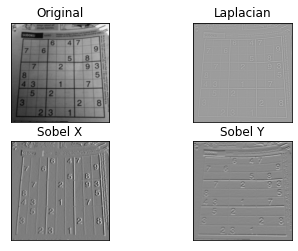

In [76]:
img = cv2.imread('6.png',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)#为什么用64？
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=1)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=1)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

In [78]:
'''
当我们可以通过参数 -1 来设定输出图像的深度（数据类型）与原图像保持一致，但是我们在代码中使用的却是 cv2.CV_64F。
这是为什么呢？想象一下一个从黑到白的边界的导数是整数，而一个从白到黑的边界点导数却是负数。
如果原图像的深度是np.int8 时，所有的负值都会被截断变成 0，换句话说就是把把边界丢失掉。
所以如果这两种边界你都想检测到，最好的的办法就是将输出的数据类型设置的更高，比如 cv2.CV_16S，cv2.CV_64F 等。
取绝对值然后再把它转回到 cv2.CV_8U。
'''

'\n当我们可以通过参数 -1 来设定输出图像的深度（数据类型）与原图像保持一致，但是我们在代码中使用的却是 cv2.CV_64F。\n这是为什么呢？想象一下一个从黑到白的边界的导数是整数，而一个从白到黑的边界点导数却是负数。\n如果原图像的深度是np.int8 时，所有的负值都会被截断变成 0，换句话说就是把把边界丢失掉。\n所以如果这两种边界你都想检测到，最好的的办法就是将输出的数据类型设置的更高，比如 cv2.CV_16S，cv2.CV_64F 等。\n取绝对值然后再把它转回到 cv2.CV_8U。\n'

### Canny 边缘检测

#### 步骤、原理

    噪声去除
      由于边缘检测很容易受到噪声影响，所以第一步是使用高斯滤波器去除噪声

    计算图像梯度
      对平滑后的图像使用 Sobel 算子计算水平方向和竖直方向的一阶导数（图像梯度）（Gx 和 Gy）。
      根据得到的这两幅梯度图（Gx 和 Gy）找到边界的梯度和方向，公式如下：
         Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2}
         Angle \; (\theta) = \tan^{-1} \bigg(\frac{G_y}{G_x}\bigg)
    梯度的方向一般总是与边界垂直。梯度方向被归为四类：垂直，水平，和两个对角线。

     非极大值抑制
      在获得梯度的方向和大小之后，应该对整幅图像做一个扫描，去除那些非边界上的点。
      对每一个像素进行检查，看这个点的梯度是不是周围具有相同梯度方向的点中最大的。

    滞后阈值
      现在要确定那些边界才是真正的边界。这时我们需要设置两个阈值：minVal 和 maxVal。
      当图像的灰度梯度高于 maxVal 时被认为是真的边界，那些低于 minVal 的边界会被抛弃。
      如果介于两者之间的话，就要看这个点是否与某个被确定为真正的边界点相连，如果是就认为它也是边界点，如果不是就抛弃。

#### OpenCV 中的 Canny 边界检测

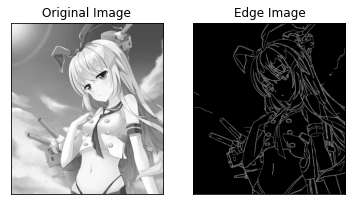

In [88]:
#OpenCV 中的 Canny 边界检测只需要一个函数：cv2.Canny()，就可以完成以上几步。
#函数的第一个参数是输入图像。第二和第三个分别是 minVal 和 maxVal。
#第三个参数设置用来计算图像梯度的 Sobel卷积核的大小，默认值为 3。
#最后一个参数是 L2gradient，它可以用来设定求梯度大小的方程。
#如果设为 True，就会使用我们上面提到过的方程，否则使用方程：Edge\_Gradient \; (G) = |G_x| + |G_y|. 代替，默认值为 False。
img = cv2.imread('1.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 图像金字塔

    目标
      • 学习图像金字塔
      • 使用图像创建一个新水果：“橘子苹果”
      • 将要学习的函数有：cv2.pyrUp()，cv2.pyrDown()。
     原理
      一般情况下，我们要处理是一副具有固定分辨率的图像。但是有些情况下，我们需要对同一图像的不同分辨率的子图像进行处理。
      这种情况下，我们需要创建创建一组图像，这些图像是具有不同分辨率的原始图像。我们把这组图像叫做图像金字塔。
      如果我们把最大的图像放在底部，最小的放在顶部，看起来像一座金字塔，故而得名图像金字塔。
      有两类图像金字塔：高斯金字塔和拉普拉斯金字塔。
      高斯金字塔的顶部是通过将底部图像中的连续的行和列去除得到的。顶部图像中的每个像素值等于下一层图像中 5 个像素的高斯加权平均值。这样操作一次一个 MxN 的图像就变成了一个 M/2xN/2 的图像。所以这幅图像的面积就变为原来图像面积的四分之一。这被称为 Octave。连续进行这样的操作我们就会得到一个分辨率不断下降的图像金字塔。我们可以使用函数cv2.pyrDown() 和 cv2.pyrUp() 构建图像金字塔。
      函数 cv2.pyrDown() 从一个高分辨率大尺寸的图像向上构建一个金子塔（尺寸变小，分辨率降低）。

(<matplotlib.axes._subplots.AxesSubplot at 0x18f358c1448>,
 <matplotlib.image.AxesImage at 0x18f359715c8>)

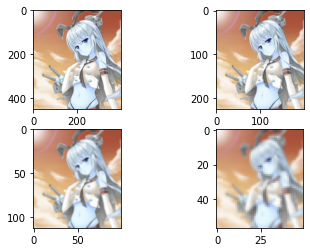

In [96]:
img=cv2.imread('1.jpg')
lower_reso = cv2.pyrDown(img)
lower_reso1 = cv2.pyrDown(lower_reso)
lower_reso2 = cv2.pyrDown(lower_reso1)
lower_reso3 = cv2.pyrDown(lower_reso2)
plt.subplot(221),plt.imshow(lower_reso)
plt.subplot(222),plt.imshow(lower_reso1)
plt.subplot(223),plt.imshow(lower_reso2)
plt.subplot(224),plt.imshow(lower_reso3)

(<matplotlib.axes._subplots.AxesSubplot at 0x18f347e6fc8>,
 <matplotlib.image.AxesImage at 0x18f34840b88>)

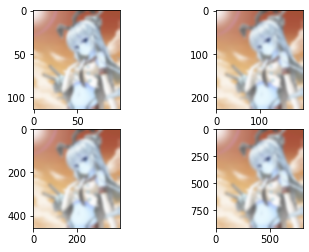

In [98]:
higher_reso = cv2.pyrUp(lower_reso3)#因为信息以丢失所以只是尺寸变大
higher_reso1 = cv2.pyrUp(higher_reso)
higher_reso2 = cv2.pyrUp(higher_reso1)
higher_reso3 = cv2.pyrUp(higher_reso2)
plt.subplot(221),plt.imshow(higher_reso)
plt.subplot(222),plt.imshow(higher_reso1)
plt.subplot(223),plt.imshow(higher_reso2)
plt.subplot(224),plt.imshow(higher_reso3)

### OpenCV 中的轮廓

    目标
      • 理解什么是轮廓
      • 学习找轮廓，绘制轮廓等
      • 函数：cv2.findContours()，cv2.drawContours()

    什么是轮廓
      轮廓可以简单认为成将连续的点（连着边界）连在一起的曲线，具有相同、的颜色或者灰度。轮廓在形状分析和物体的检测和识别中很有用。
      • 为了更加准确，要使用二值化图像。在寻找轮廓之前，要进行阈值化处理、或者 Canny 边界检测。
      • 查找轮廓的函数会修改原始图像。如果你在找到轮廓之后还想使用原始图、像的话，你应该将原始图像存储到其他变量中。
      • 在 OpenCV 中，查找轮廓就像在黑色背景中超白色物体。你应该记住，、要找的物体应该是白色而背景应该是黑色。
    让我们看看如何在一个二值图像中查找轮廓：
      函数 cv2.findContours() 有三个参数，第一个是输入图像，第二个是轮廓检索模式，第三个是轮廓近似方法。
      返回值有二个，第一个是轮廓，第二个是（轮廓的）层析结构。
      轮廓（第二个返回值）是一个 Python列表，其中存储这图像中的所有轮廓。每一个轮廓都是一个 Numpy 数组，包含对象边界点（x，y）的坐标。

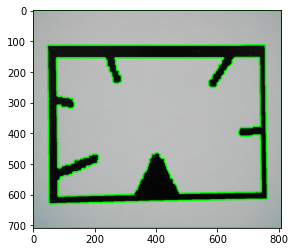

In [4]:
#函数 cv2.drawContours() 可以被用来绘制轮廓。
#它可以根据你提供的边界点绘制任何形状。
#它的第一个参数是原始图像，第二个参数是轮廓，一个 Python 列表。第三个参数是轮廓的索引（在绘制独立轮廓是很有用，当设置为 -1 时绘制所有轮廓）。
#接下来的参数是轮廓的颜色和厚度等。
img = cv2.imread('7.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img1 = cv2.drawContours(img.copy(),contours,-1,(0,255,0),3)#-1全画，可选0，1，2...
plt.imshow(img1)

#### 轮廓特征

    目标
      • 查找轮廓的不同特征，例如面积，周长，重心，边界框等。
      • 你会学到很多轮廓相关函数

##### 矩

In [5]:
#图像的矩可以帮助我们计算图像的质心，面积等。
#函数 cv2.moments() 会将计算得到的矩以一个字典的形式返回
cnt = contours[0]#取最大轮廓
M = cv2.moments(cnt)
print (M)#矩
cx = int(M['m10']/M['m00'])#重心
cy = int(M['m01']/M['m00'])
print(cx,cy)#M['m00']轮廓面积

{'m00': 572064.0, 'm10': 231113856.0, 'm01': 202510656.0, 'm20': 124493330432.0, 'm11': 81814305024.0, 'm02': 95585029632.0, 'm30': 75442958241792.0, 'm21': 44070638972928.0, 'm12': 38616351971328.0, 'm03': 50755650734592.0, 'mu20': 31123332608.0, 'mu11': 0.0, 'mu02': 23896257408.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.09510357815442562, 'nu11': 0.0, 'nu02': 0.07301980198019803, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
404 354


In [43]:
#轮廓面积
area = cv2.contourArea(cnt)#或者M['m00']
print(area)

572064.0


In [44]:
#轮廓周长（弧长）
perimeter = cv2.arcLength(cnt,True)
#这个函数的第二参数可以用来指定对象的形状是闭合的（True），还是打开的（一条曲线）。
print(perimeter)

3032.0


##### 轮廓近似

    将轮廓形状近似到另外一种由更少点组成的轮廓形状，新轮廓的点的数目由我们设定的准确度来决定。使用的Douglas-Peucker算法。
    为了帮助理解，假设我们要在一幅图像中查找一个矩形，但是由于图像的种种原因，我们不能得到一个完美的矩形，而是一个“坏形状”。
    可以使用cv2.approxPolyDP(cnt,epsilon,True)函数来近似这个形状了。
    这个函数的第二个参数叫epsilon，它是从原始轮廓到近似轮廓的最大距离。
    它是一个准确度参数。选择一个好的 epsilon 对于得到满意结果非常重要。

In [70]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
#img1=cv2.drawContours(img.copy(), approx, -1, (0, 0, 255), 3)
img1=cv2.polylines(img.copy(), [approx], True, (0, 255,0), 2)
#不明原因，画不出来

#### 凸包

    凸包与轮廓近似相似，但不同，虽然有些情况下它们给出的结果是一样的。
    函数 cv2.convexHull() 可以用来检测一个曲线是否具有凸性缺陷，并能纠正缺陷。
    一般来说，凸性曲线总是凸出来的，至少是平的。如果有地方凹进去了就被叫做凸性缺陷。

In [74]:
#hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]
# points 我们要传入的轮廓
#hull 输出，通常不需要
#clockwise 方向标志。如果设置为 True，输出的凸包是顺时针方向的。否则为逆时针方向。
#returnPoints 默认值为 True。它会返回凸包上点的坐标。如果设置为 False，就会返回与凸包点对应的轮廓上的点。
#如果你想获得凸性缺陷，需要把 returnPoints 设置为 False
hull = cv2.convexHull(cnt)
print(hull)

[[[808 708]]

 [[  0 708]]

 [[  0   0]]

 [[808   0]]]


##### 凸性检测

In [73]:
#cv2.isContourConvex() 可以可以用来检测一个曲线是不是凸的。它只能返回 True 或 False
print(cv2.isContourConvex(cnt))

True


#### 轮廓拟合

##### 边界矩形

    有两类边界矩形。
    直边界矩形 一个直矩形（就是没有旋转的矩形）。
    它不会考虑对象是否旋转。所以边界矩形的面积不是最小的。可以使用函数 cv2.boundingRect() 查找得到。
    （x，y）为矩形左上角的坐标，（w，h）是矩形的宽和高。

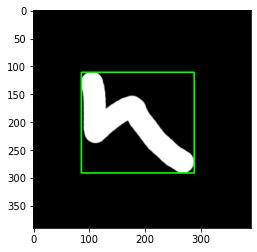

In [29]:
#直矩形
img = cv2.imread('8.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

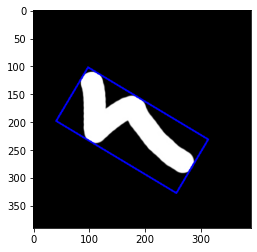

In [44]:
#旋转矩形
img = cv2.imread('8.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img=cv2.drawContours(img,[box],0,(0,0,255),2)
plt.imshow(img)

##### 最小外接圆

    函数 cv2.minEnclosingCircle() 可以帮我们找到一个对象的外切圆。它是所有能够包括对象的圆中面积最小的一个。

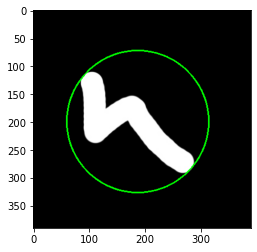

In [43]:
img = cv2.imread('8.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img=cv2.circle(img,center,radius,(0,255,0),2)
plt.imshow(img)

##### 椭圆拟合

    函数为 cv2.ellipse()，返回值其实就是旋转边界矩形的内切圆。

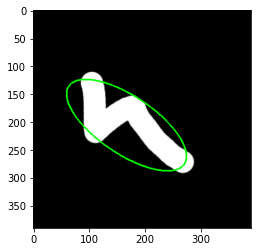

In [42]:
img = cv2.imread('8.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
ellipse = cv2.fitEllipse(cnt)
img=cv2.ellipse(img,ellipse,(0,255,0),2)
plt.imshow(img)

##### 直线拟合

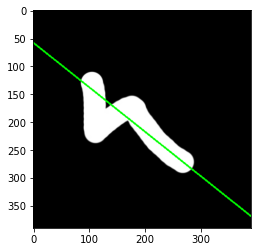

In [41]:
img = cv2.imread('8.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)
plt.imshow(img)

#### 轮廓性质

In [45]:
#长宽比，边界矩形的宽高比
#Aspect \; Ratio = \frac{Width}{Height}
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
print(aspect_ratio)

In [48]:
#Extent,轮廓面积与边界矩形面积的比。
#Extent = \frac{Object \; Area}{Bounding \; Rectangle \; Area}
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print(extent)

0.3452007700770077


In [50]:
#Solidity,轮廓面积与凸包面积的比。
#Solidity = \frac{Contour \; Area}{Convex \; Hull \; Area}
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print(solidity)

0.6675974682197755


In [51]:
#Equivalent Diameter,与轮廓面积相等的圆形的直径
#Equivalent \; Diameter = \sqrt{\frac{4 \times Contour \; Area}{\pi}}
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print(equi_diameter)

126.41624162165


In [52]:
#方向,对象的方向，下面的方法还会返回长轴和短轴的长度
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
print(angle)

123.99335479736328


In [9]:
#掩模和像素点
#有时我们需要构成对象的所有像素点
mask = np.zeros(imgray.shape,np.uint8)
# 这里一定要使用参数 -1, 绘制填充的的轮廓
cv2.drawContours(mask,[cnt],0,255,-1)
#Returns a tuple of arrays, one for each dimension of a,
#containing the indices of the non-zero elements in that dimension.
#The result of this is always a 2-D array, with a row for
#each non-zero element.
#To group the indices by element, rather than dimension, use:
#transpose(nonzero(a))
#>>> x = np.eye(3)
#>>> x
#array([[ 1., 0., 0.],
# [ 0., 1., 0.],
# [ 0., 0., 1.]])
#>>> np.nonzero(x)
#(array([0, 1, 2]), array([0, 1, 2]))
#>>> x[np.nonzero(x)]
#array([ 1., 1., 1.])
#>>> np.transpose(np.nonzero(x))
#array([[0, 0],
# [1, 1],
# [2, 2]])
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)
print(pixelpoints)
#这里我们是用来两种方法，第一种方法使用了 Numpy 函数，第二种使用了 OpenCV 函数。
#结果相同，但还是有点不同。Numpy 给出的坐标是 （row ，colum ）形式的。
#而 OpenCV 给出的格式是 （x ，y ）形式的。所以这两个结果基本是可以互换的。row=x，colunm=y。

[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [708 806]
 [708 807]
 [708 808]]


In [10]:
#最大值和最小值及它们的位置
#我们可以使用掩模图像得到这些参数。
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask)

In [12]:
#极点
#一个对象最上面，最下面，最左边，最右边的点。
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0]

SyntaxError: unexpected EOF while parsing (<ipython-input-12-a969d95a1ab1>, line 6)

In [14]:
print(cnt[cnt[:,:,0].argmin())

SyntaxError: invalid syntax (<ipython-input-14-9168369b7a9e>, line 1)